In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import sklearn.datasets as datasets
from scipy.stats import chisquare
%matplotlib inline

import os
import numpy as np
import pandas as pd
import numpy.random as rand
from itertools import islice
#Models
import sklearn.model_selection as cv
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier,
                             RandomForestRegressor)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, make_scorer, confusion_matrix
from sklearn.metrics import f1_score

from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)
#NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer


## Load Training Data 

In [3]:

df_train = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)
df_test = pd.read_csv('drugsCom_raw/drugsComTest_raw.tsv',sep='\t',index_col=0)

(161297, 6)

In [5]:
df_test = pd.read_csv('drugsCom_raw/drugsComTest_raw.tsv',sep='\t',index_col=0)


In [6]:
df_test.shape

(53766, 6)

In [7]:
def create_rating_label(df):
    if df['rating'] >= 7: 
        return 'high'
    elif (df['rating'] < 4):
        return 'low'
    else :
        return 'neutral'

In [8]:
df_test.shape

(53766, 6)

In [10]:
df_train['label']=df_train.apply(create_rating_label, axis=1)

In [11]:
df_test['label']=df_test.apply(create_rating_label, axis=1)

In [12]:
df_train['label'].value_counts()/len(df_train['label'])

high       0.662542
low        0.217382
neutral    0.120077
Name: label, dtype: float64

# 2. NLP

## 2.1 Sentiment Analysis
### 2.1.1 Vectorizerization of words using tf-idf

In [14]:
df_train.shape

(161297, 7)

In [15]:
df_test.shape

(53766, 7)

## Step -1 
### Preprocessing Data to remove non ascii
### Preprocessing Data to remove punctuation 
### Preprocessing Data to replace numbers in strings 
### Preprocessing to remove Stopwords

In [16]:
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

punctuation_ = string.punctuation+'``'+"''"+'...'+''#039
stopwords_ = set(stopwords.words('english'))
stemmer_porter = PorterStemmer()


def remove_nonascii(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

# filter stop words and punctuation

def filter_stop_punct(tokenised_word):
    w_list=[]
    for w in tokenised_word: 
        if (w not in stopwords_) and (w not in punctuation_):
            w_list.append(w.lower())
    return w_list


# Replace numbers in string 

def 






def nlp_pipeline(df):
    review_lst=[]
    filtered_text=[]
    tokens_stemporter_lst=[]
    for review in df['review'][:1]:
        input_string = remove_accents(review)
        tokenised_word=word_tokenize(input_string)
        tokenised_word_fltr=filter_stop_punct(tokenised_word)
        #print(tokenised_word_fltr)
        tokens_stemporter = list(map(stemmer_porter.stem, tokenised_word_fltr))
        tokens_stemporter_lst.append(tokens_stemporter)           
    return tokens_stemporter_lst   #review_lst.append(stopwords1)

In [17]:
def nlp_pipeline(df):
    review_lst=[]
    filtered_text=[]
    tokens_stemporter_lst=[]
    for review in df['review'][:10]:
        input_string = remove_accents(review)
        tokenised_word=word_tokenize(input_string)
        tokenised_word_fltr=filter_stop_punct(tokenised_word)
        
    return tokenised_word_fltr   #review_lst.append(stopwords1)

## Creating tfidf for review data 

### for Train data

In [91]:
#Cleaning Up data 

#Step -1 
### Preprocessing Data to remove non ascii
### Preprocessing Data to remove punctuation 
## reprocessing Data to replace numbers in strings 
## Preprocessing to remove Stopwords

#Stemming, Tokenisation and Lemmatisation




stemmer = SnowballStemmer('english')
import nltk 
import re

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    remove_special_char = re.compile('r[^a-z\d]',re.IGNORECASE)

   # Regex to replace all numerics
    replace_numerics = re.compile(r'\d+',re.IGNORECASE)

    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',tokenizer=tokenize,max_features= 20000)
X_train = tfidf.fit_transform(df_train['review'])
X_test = tfidf.transform(df_test['review'])

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


### for Test data


In [22]:
y_train = df_train['label']
y_test = df_test['label']

print(X_train.shape)
print(X_test.shape)

(161297, 20000)
(53766, 20000)


In [75]:
Y_train=df_train['label']
Y_test=df_test['label']

In [88]:
print('Readying the preprocessing functions')

# Regex for removing non-alphanumeric characters and spaces
remove_special_char = re.compile('r[^a-z\d]',re.IGNORECASE)

# Regex to replace all numerics
replace_numerics = re.compile(r'\d+',re.IGNORECASE)

# Load NLTK stop words
stop_words = nltk.corpus.stopwords.words('english')
print ("NLTK stopword list length: ",len(stop_words),'words')

# Add custom drug stopwords
#stop_words.extend(drug_stopwords)
#print ("Added custom stopwords")
#print ("New stopword list length: ",len(stop_words),'words')



#######################################################
#NORMALIZER, RUNS IN PREPROCESS
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


# Define Text-PreProcessing function
#################################################################
def preprocess_text(text, remove_stopwords = True, perform_stemming = True):
    #first clean text then go to lowercase and split.
    text = text.replace(r"http\S+", "")
    text = text.replace(r"http", "")
    text = text.replace(r"(\d)", "")
    text = text.replace(r"@\S+", "")
    text = text.replace(r"@", "at")
    text = remove_special_char.sub('', text)
    text = replace_numerics.sub('n', text)
    text = emoji_pattern.sub('', text)
    text = text.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    text = text.replace( r"(\-)|(\\)|(\s{2,})"," ")
    text = text.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    text = text.replace(r"(&#n;)", "")
    
    # per/wordprocessing
    textlist = text.lower().split()
    textlist = normalize(textlist)
    text = ' '.join(textlist) 
    #stopword removal (nltk + custom drug stopwords)
#    if(remove_stopwords):
#        textlist = [word for word in textlist if word not in stop_words]
  
    # stemming  
    if(perform_stemming):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = ' '.join(stemmed_words)
        
    return text    


IndentationError: unexpected indent (<ipython-input-88-c79829c2aa1d>, line 7)

In [93]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"(\d)", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n\``]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

df_train_cln = standardize_text(df_train, "review")

# Save locally. 
df_train_cln.to_csv("train_clean_data.csv")


In [80]:
df_test_cln.to_csv("test_clean_data.csv")

In [83]:
!cat test_clean_data.csv|head -10>> test_clean_data_10.csv
!cat train_clean_data.csv|head -10>> train_clean_data_10.csv 

cat: stdout: Broken pipe


In [84]:
### Clean and Save Test Data 
df_train_cln=pd.read_csv("train_clean_data_10.csv")
df_test_cln=pd.read_csv("test_clean_data_10.csv")

In [85]:
#df_test_cln = standardize_text(df_test, "review")

#df_test_cln.to_csv("test_clean_data.csv")
trn_tkn=tokenize(df_train_cln['review'])
test_tkn=tokenize(df_test_cln['review'])

In [86]:
df_train_cln['review']

0     "it has no side effect, i take it in combinati...
1     "my son is halfway through his fourth week of ...
2     "i used to take another oral contraceptive, wh...
3     "this is my first time using any form of birth...
4     "suboxone has completely turned my life around...
5     "nd day on mg started to work with rock hard e...
6     "he pulled out, but he cummed a bit in me  i t...
7                                                review
8     "it has no side effect, i take it in combinati...
9     "my son is halfway through his fourth week of ...
10    "i used to take another oral contraceptive, wh...
11    "this is my first time using any form of birth...
12    "suboxone has completely turned my life around...
13    "nd day on mg started to work with rock hard e...
14    "he pulled out, but he cummed a bit in me  i t...
Name: review, dtype: object

In [87]:
### Change Y_train & Y_test to binary classification 

max_review_length = 500
X_train_s = sequence.pad_sequences(trn_tkn, maxlen=max_review_length)
X_test_s = sequence.pad_sequences(test_tkn, maxlen=max_review_length)

ValueError: invalid literal for int() with base 10: '``'

In [84]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.SimpleRNN(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mse')

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [86]:
print(X_train1.shape)
print(X_test1.shape)

(161297, 68005)
(53766, 68005)


## Modelling 

###  Random Forest 

In [88]:
rf = RandomForestClassifier(oob_score=True,n_estimators=20,random_state=0)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
print(rf.score(X_test, Y_test))
##0.8777480191942864  ##n_estimators=20 ## with all the features before restricting the number of 

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8777480191942864


### Confusion Matrix for Random Forest Classifier 


In [108]:
rfcm=confusion_matrix(Y_test,rf_pred)
rfcm

In [186]:
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

        high       0.85      0.99      0.92     35440
         low       0.94      0.69      0.80     11838
     neutral       0.99      0.59      0.74      6488

    accuracy                           0.88     53766
   macro avg       0.93      0.76      0.82     53766
weighted avg       0.89      0.88      0.87     53766



In [134]:
#df_train['label'].value_counts(normalize=True)
#df_test['label'].value_counts()
list(df_test['label'].unique())
#high       0.662542
#low        0.217382
#neutral    0.120077

['high', 'neutral', 'low']

In [151]:
labels=rfcm
labels

array([[35135,   294,    11],
       [ 3618,  8198,    22],
       [ 2387,   241,  3860]])

              precision    recall  f1-score   support

        high       0.70      0.99      0.82     35440
         low       0.80      0.23      0.35     11838
     neutral       0.53      0.00      0.00      6488

    accuracy                           0.70     53766
   macro avg       0.68      0.41      0.39     53766
weighted avg       0.70      0.70      0.62     53766



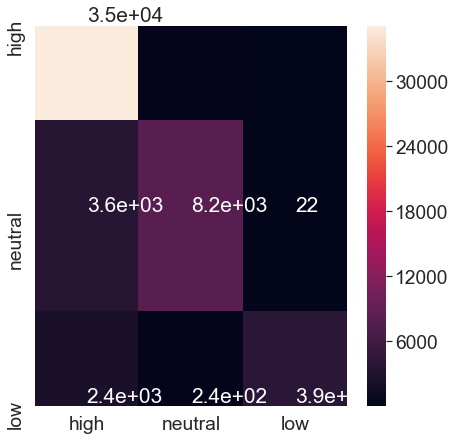

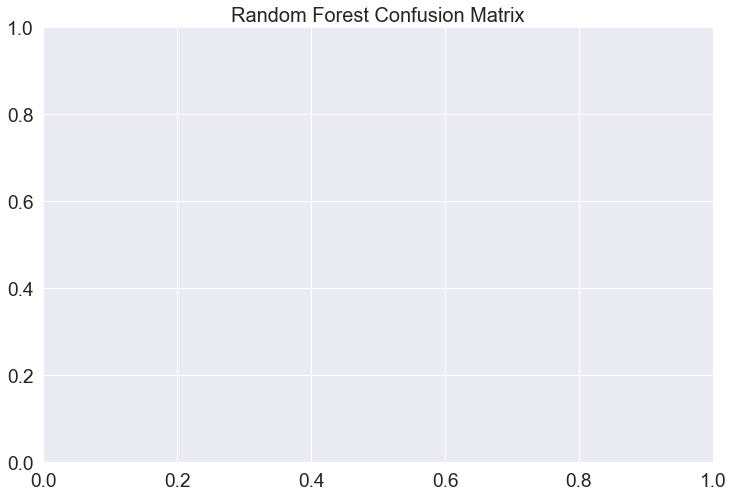

In [185]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
df_cm = pd.DataFrame(rfcm, index = list(df_test['label'].unique()),
                  columns = list(df_test['label'].unique()))
sns.set(font_scale = 1.75)
annot_kws = {"ha": 'left',"va": 'bottom'}
sns.heatmap(df_cm, annot=labels,annot_kws=annot_kws)
fig, ax = plt.subplots()
plt.title('Random Forest Confusion Matrix',fontsize=20)
plt.savefig('Random Forest Confusion Matrix')
print(classification_report(y_test, y_pred))

In [ ]:
### Print Random Forst confusion Matrix 

In [173]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    annot_kws = {"va": 'top'}
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws=annot_kws)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

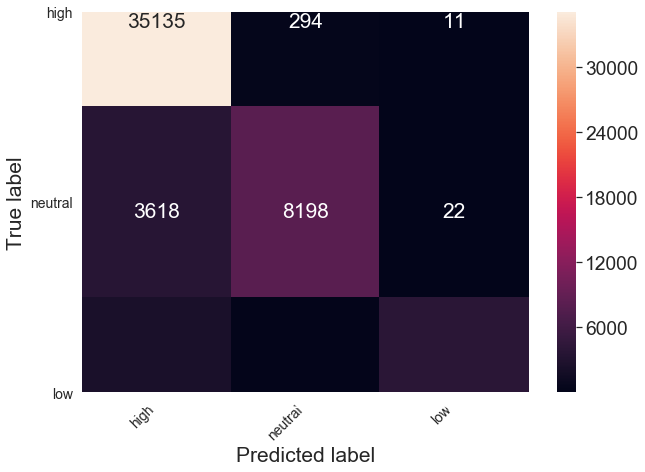

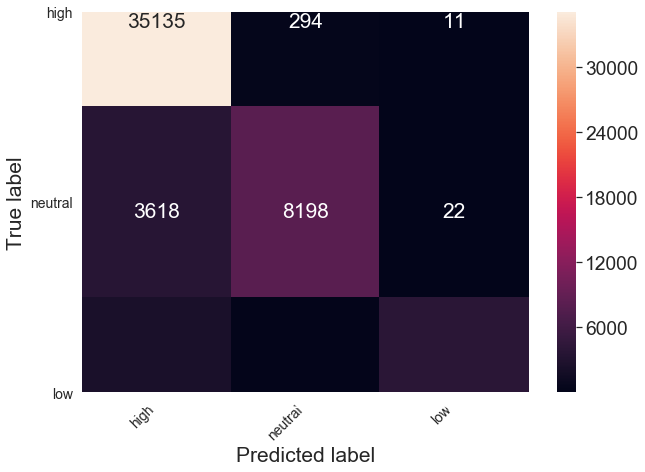

In [174]:
print_confusion_matrix(rfcm,list(df_test['label'].unique()) , figsize = (10,7), fontsize=14)

### Gradient Boosting

In [99]:
N_ESTIMATORS = 10
gb = GradientBoostingClassifier(learning_rate=0.01, 
                                   n_estimators=N_ESTIMATORS, 
                                   min_samples_leaf=10)
gb.fit(X_train,Y_train)
gb.pred = gb.predict(X_test)
print(gb.score(X_test, Y_test)) ##0.6591526243350817

0.6591526243350817


### Logistic Rgression

In [100]:
lg = LogisticRegression()
lg.fit(X_train,Y_train)
lg.pred = lg.predict(X_test)
print(lg.score(X_test, Y_test))

### 0.7715656734739427

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7715656734739427


In [ ]:
### Support Vector machines

In [105]:
df_train

,drugName,condition,review,rating,date,usefulCount,label
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,high
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,high
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,high
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,high
155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43,low
165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5,low
102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,high
74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11,low
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,high


### Using Multinomial Naves Baies

In [184]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb =  MultinomialNB()
nb.fit(X_train, Y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7039392924896775
              precision    recall  f1-score   support

        high       0.70      0.99      0.82     35440
         low       0.80      0.23      0.35     11838
     neutral       0.53      0.00      0.00      6488

    accuracy                           0.70     53766
   macro avg       0.68      0.41      0.39     53766
weighted avg       0.70      0.70      0.62     53766

